In [1]:
# Import the relevant Python libraries and modules needed in this lab.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset provided into a DataFrame.

df = pd.read_csv("Unicorn_Companies.csv")

In [3]:
# Display the first 10 rows of the data.

df.head(3)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."


In [4]:
# Identify the number of rows and columns in the dataset.

df.shape

(1074, 10)

- There are 1074 rows and 10 columns in the dataset.
- According to this dataset, there are 1074 unicorn companies, as of March 2022. 
- This dataset shows 10 aspects of each company. 

### Check for duplicates in the data

In [5]:
# Check for duplicates.
print('Duplicated data in the dataset: ', df.duplicated().sum())
print('Duplicated data in the dataset: ', df.shape[0] - df.drop_duplicates().shape[0])

Duplicated data in the dataset:  0
Duplicated data in the dataset:  0


- Since the shape that is returned after dropping duplicates is the same as the shape of the original DataFrame, you can infer that there are no duplicate values in the dataset. 

In [6]:
# Display the data types of the columns.
df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [7]:
# Sort `companies` and display the first 10 rows of the resulting DataFrame.
# To arrange the data from latest to earliest `Year Founded`
df.sort_values(by="Year Founded", ascending=False).head(10)


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
782,Phantom,$1B,1/31/22,Fintech,San Francisco,United States,North America,2021,$118M,"Paradigm, Andreessen Horowitz, Jump Capital"
714,Yidian Zixun,$1B,10/17/17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund"
822,GlobalBees,$1B,12/28/21,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca..."
554,ClickHouse,$2B,10/28/21,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par..."
952,LayerZero Labs,$1B,3/30/22,Internet software & services,New York,United States,North America,2021,$143M,"Andreessen Horowitz, FTX Ventures, Tiger Globa..."
314,Flink Food,$3B,12/1/21,E-commerce & direct-to-consumer,Berlin,Germany,Europe,2021,$1B,"Mubadala Capital, Bond, Prosus Ventures"
864,Aptos,$1B,3/15/22,Internet software & services,Palo Alto,United States,North America,2021,$200M,"Andreessen Horowitz, Coinbase Ventures, Tiger ..."
238,Yuga Labs,$4B,3/22/22,Fintech,Miami,United States,North America,2021,$450M,"Andreessen Horowitz, Thrive Capital, Sound Ven..."
775,Jokr,$1B,12/2/21,E-commerce & direct-to-consumer,New York,United States,North America,2021,$430M,"GGV Capital, Tiger Global Management, Greycroft"
967,Mensa Brands,$1B,11/16/21,Other,Bengaluru,India,Asia,2021,$218M,"Accel, Falcon Edge Capital, Norwest Venture Pa..."


(sorted by `Year Founded` in descending order and displayed the first 10 rows of the resulting DataFrame)
  - These 10 rows correspond to unicorn companies that were founded in 2021. 
  - These 10 companies were founded in different parts of the world and belong to different industries. 
  - Many of these 10 companies were founded in the United States and belong to "Fintech," "E-commerce & direct-to-consumer," and "Internet software & services" industries. 

In [8]:
# Display each unique year that occurs in the dataset
# along with the number of companies that were founded in each unique year.

df["Year Founded"].value_counts().sort_values(ascending=False)


Year Founded
2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2000     11
2021     11
2001      9
1999      8
2004      8
2003      8
1998      5
2002      4
1994      2
1995      2
1992      1
1993      1
1990      1
1984      1
1996      1
1979      1
1991      1
1919      1
1997      1
Name: count, dtype: int64


- `2015` has the highest count. This indicates that `2015` is the year when the largest number of companies in this dataset were founded.

A histogram is a graphical representation of a frequency distribution, which shows how frequently each value in a dataset or variable occurs.

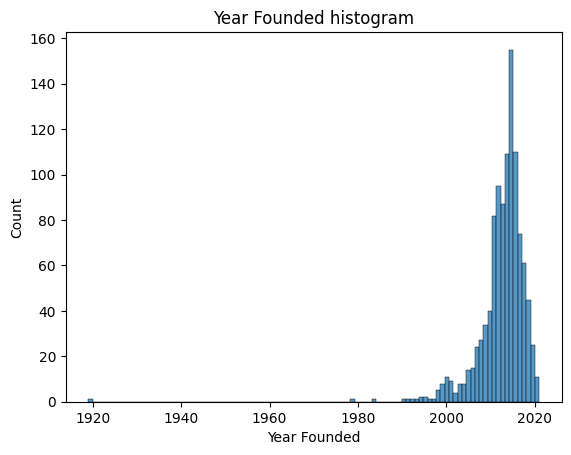

In [9]:
sns.histplot(data=df, x='Year Founded')
plt.title('Year Founded histogram');


- Given that the `Date Joined` columns currently has the data type `object`, if you wanted to compare when one company joined unicorn status to when another company joined, it would not be possible to achieve this meaningfully, as is. If this column were transformed so that it had a `datetime` data type instead, then it could be used to meaningfully compare `Date Joined` of one company to another. 

In [16]:
# Convert `Date Joined` column to datetime.
# Update the column with the converted values.

df["Date Joined"] = pd.to_datetime(df["Date Joined"],format = '%m/%d/%y')

# Display the data types of the columns in `companies`
# to confirm that the update actually took place

df.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
Month Joined                object
Years To Join                int64
dtype: object

In [19]:
# Obtain the names of the months when companies gained unicorn status.
# Use the result to create a `Month Joined` column.

df["Month Joined"] = df["Date Joined"].dt.month_name()


# Display the first few rows of `companies`
# to confirm that the new column did get added.

df.head(3)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10


In [20]:
# Determine how many years it took for companies to reach unicorn status.
# Use the result to create a `Years To Join` column.

df["Years To Join"] = df["Date Joined"].dt.year - df["Year Founded"]

# Display the first few rows of `companies`
# to confirm that the new column did get added.

df.head(3)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10


- Get more insight on the year 2021, as that is the most recent year for which there is data available. Trends that took place in 2021 might be similar to trends that will take place in 2022. 

### Gain more insight on a specific year


In [21]:
# Filter dataset by a year of your interest (in terms of when companies reached unicorn status).
# Save the resulting subset in a new variable .
df_2021 = df[df["Date Joined"].dt.year == 2021]


# Display the first few rows of the subset to confirm that it was created
df_2021.head(3)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",July,3
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",April,6
24,Blockchain.com,$14B,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",February,10


**Question:** Using a time interval, how could you observe trends in the companies that became unicorns in one year?

- First, identify a time interval of your choice. Then, take the subset that consists of the data for the year of interest, create a column that contains the time interval that each data point belongs to (as needed), group by that column, and count the number of companies that joined per interval. 
  - For example, if a subset consisted of companies that joined in 2021, create a column that corresponds to week joined, group by week, and count the number of companies that joined per week. This allows the observation of trends over the weeks of 2021. 

### Observe trends over time

Implement the structuring approach that you have identified to observe trends over time in the companies that became unicorns for the year that interests you.

In [22]:
# After identifying the time interval that interests you, proceed with the following:
# Step 1. Take the subset that you defined for the year of interest. 
#         Insert a column that contains the time interval that each data point belongs to, as needed.
# Step 2. Group by the time interval.
#         Aggregate by counting companies that joined per interval of that year.
#         Save the resulting DataFrame in a new variable.

# Insert a `Week Joined` column into `companies_2021.`
df_2021.insert(3, "Week Joined", df_2021["Date Joined"].dt.strftime('%Y-W%V'), True)

# Group `df_2021` by `Week Joined`. 
# Aggregate by counting companies that joined per week of 2021.
# Save the resulting DataFrame in a new variable.
df_by_week_2021 = df_2021.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})

# Display the first few rows of the new DataFrame to confirm that it was created.

df_by_week_2021.head()


,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


**Question:** How would you structure the data to observe trends in the average valuation of companies from 2020 to 2021?  

- One approach consists of the following:
  - Choose a time interval over which you want to observe average valuation.
  - Create a subset of data that corresponds to the additional year. Concatenate that subset with the previous subset you created, in order to get the data for both years in one DataFrame. 
  - Create a column that contains the time interval that each data point belongs to (as needed), group by that column, and compute the average funding of companies that joined per interval. 
- To compare trends in average valuation of companies quarterly between 2021 and 2020, if you already had a subset for 2021, you could do the following: 
- Create a subset for 2020.
- Concatenate that with the subset for 2020.
- Create a column that corresponds to quarter joined.
- Group by quarter.
- Compute the average valuation of companies that joined per quarter. 

This allows the observation of trends over the quarters of 2020 compared to 2021. 

### Compare trends over time

Implement the structuring approach that you have identified in order to compare trends over time in the average valuation of companies that became unicorns between your years of interest. Keep in mind the data type of the `Valuation` column and what the values in that column contain currently.

In [24]:
# After identifying the additional year and time interval of interest, proceed with the following:
# Step 1. Filter by the additional year to create a subset that consists of companies that joined in that year.
# Step 2. Concatenate that new subset with the subset that you defined previously.
# Step 3. As needed, add a column that contains the time interval that each data point belongs to, 
#         in the concatenated DataFrame.
# Step 4. Transform the `Valuation` column as needed.
# Step 5. Group by the time interval.
#         Aggregate by computing average valuation of companies that joined per interval of the corresponding year.
#         Save the resulting DataFrame in a new variable.

# Filter by the additio      nal year to create a subset that consists of companies that joined in that year.
df_2020 = df[df["Date Joined"].dt.year == 2020]

# Concatenate the new subset with the subset that you defined previously.
df_2020_2021 = pd.concat([df_2020, df_2021.drop(columns="Week Joined")])

# Add `Quarter Joined` column to `companies_2021`.
df_2020_2021["Quarter Joined"] = df_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')

# Convert the `Valuation` column to numeric by removing `$` and `B` and casting each value to data type `float`.
df_2020_2021["Valuation"] =  df_2020_2021["Valuation"].str.strip("$B").astype(float)

# Group `companies_2020_2021` by `Quarter Joined`, 
# Aggregate by computing average `Funding` of companies that joined per quarter of each year.
# Save the resulting DataFrame in a new variable.
df_by_quarter_2020_2021 = df_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})

# Display the first few rows of the new DataFrame to confirm that it was created.

df_by_quarter_2020_2021.head()


,Quarter Joined,Average Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.777778
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.750000


## Step 3: Time-to-unicorn visualization

### Visualize the time it took companies to become unicorns

As a next step, visualize your data. Using the `companies` dataset, create a box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined. 

In [25]:
# Define a list that contains months in chronological order.

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", 
               "December"]

# Print out the list to confirm it is correct.

print(month_order)
            

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


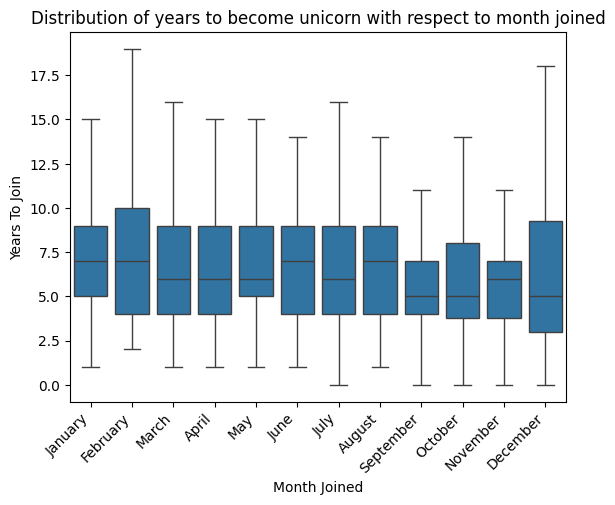

In [26]:
# Create the box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined.
# Make sure the x-axis goes in chronological order by month, using the list you defined previously.
# Plot the data from the `companies` DataFrame.

sns.boxplot(x=df['Month Joined'], 
            y=df['Years To Join'], 
            order=month_order, 
            showfliers=False)

# Set the title of the plot.

plt.title('Distribution of years to become unicorn with respect to month joined')

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text. 


plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.

plt.show()


 **Question:** In the preceding box plot, what do you observe about the median value for `Years To Join` for each month?
 
- In the preceding box plot, the median value for `Years To Join` is different for each month. Also, the median `Years To Join` is lower for the months of September and October. This could indicate that companies that reached unicorn status in early fall took less time to reach $1 billion valuation. This is because the number of companies is relatively close/consistent for each month. If that were not the case, it would be misleading to compare the median values from the box plots between months.

## Step 4: Results and evaluation


### Visualize the time it took companies to reach unicorn status


In [ ]:
# Set the size of the plot.

plt.figure(figsize=(10,6))

# Create bar plot to visualize the average number of years it took companies to reach unicorn status 
# with respect to when they were founded.
# Plot data from the `companies` DataFrame.

sns.barplot(x=df["Year Founded"], y=df["Years To Join"], ci=False)


# Set title

plt.title("Bar plot of years to join with respect to year founded")


# Set x-axis label

plt.xlabel("Year founded")


# Set y-axis label

plt.ylabel("Years to join unicorn status")


# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.  

plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.

plt.show()

- There appears to be a trend wherein companies that were founded later took less time to reach unicorn status, on average. 

**Note:** This is a bias that is common in time data—because companies founded in later years have been around for less time. Therefore, there is less time to collect data on such companies compared to companies founded in earlier years). 


### Visualize the number of companies that joined per interval 

Using the subset of companies joined in the year of interest, grouped by the time interval of your choice, create a bar plot to visualize the number of companies that joined per interval for that year.

In [ ]:
# Set the size of the plot.

plt.figure(figsize = (20, 5))

# Create bar plot to visualize number of companies that joined per interval for the year of interest.


plt.bar(x=df_by_week_2021['Week Joined'],height=df_by_week_2021['Company Count'])
plt.plot()

# Set the x-axis label.


plt.xlabel("Week number")

# Set the y-axis label.


plt.ylabel("Number of companies")

# Set the title.


plt.title("Number of companies that became unicorns per week in 2021")

# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.  

plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)

# Display the plot.

plt.show()

**Question:** What do you observe from the bar plot of the number of companies that joined per interval for the year of 2021? When did the highest number of companies reach $1 billion valuation?

- Observations from a bar plot of the number of companies that became unicorns per week in 2021:

  - The number of companies that joined unicorn status fluctuated over the weeks of 2021, with a trend of decline followed by increase occurring periodically.
  - The highest number of companies reached $1 billion valuation in Week 37 of 2021, which corresponds to the third week of September 2021. 
  - The weeks in 2021 with the next highest number of companies becoming unicorns are Week 12 (which corresponds to the fourth week of March) and Week 28 (which corresponds to the third week of July). 
  

### Visualize the average valuation over the quarters

Using the subset of companies that joined in the years of interest, create a grouped bar plot to visualize the average valuation over the quarters, with two bars for each time interval. There will be two bars for each time interval. This allows you to compare quarterly values between the two years.

In [ ]:
# Using slicing, extract the year component and the time interval that you specified, 
# and save them by adding two new columns into the subset. 

df_by_quarter_2020_2021['Quarter Number'] = df_by_quarter_2020_2021['Quarter Joined'].str[-2:]
df_by_quarter_2020_2021['Year Joined'] = df_by_quarter_2020_2021['Quarter Joined'].str[:4]

# Set the size of the plot.


plt.figure(figsize = (10, 5))

# Create a grouped bar plot.

sns.barplot(x=df_by_quarter_2020_2021['Quarter Number'],
            y=df_by_quarter_2020_2021['Average Valuation'],
            hue=df_by_quarter_2020_2021['Year Joined'])
plt.plot()

# Set the x-axis label.

plt.xlabel("Quarter number")

# Set the y-axis label.

plt.ylabel("Average valuation (billions of dollars)")

# Set the title.

plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")

# Display the plot.

plt.show()

- Observations from a grouped bar plot of average valuation of companies that became unicorns per quarter in 2020 vs. 2021:

  - In each quarter, the average valuation of companies that joined unicorn status was higher in 2020 than in 2021. 
  - In 2020, Q3 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of increase from Q1 to Q2 and from Q2 to Q3. 
  - In 2021, Q1 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of decrease across the quarters.
  

- Potential bias:

  - If there were bias in terms of which cities and countries were taken into account when collecting the data, then the analysis would be more representative of the cities and countries that are in the dataset than those that are not.
  - If the dataset did not include certain industries, then the analysis would be more representative of the industries that are included and may not reflect trends in those that are excluded from the data. 
  - If the dataset had time gaps, (e.g., if companies that joined in certain windows of time were not included in the data), then that may have affected the patterns observed, depending on how salient the gaps were.
  - Another point of bias pertains to the nature of time data; there have been fewer years to collect data on companies that were founded more recently than for companies that were founded longer ago.

- Possible questions:

  - How many rounds of funding did each company require and when did this funding take place?
  - Have any of these unicorn companies acquired other companies along the way? If so, which companies acquired other companies, which companies did they acquire, and when did the acquisitions take place?

**References**

Bhat, M.A. (2022, March).[*Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies). 
